In [2]:
# 8.1. Решите линейную систему:
import numpy as np
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

In [3]:
A1 = np.linalg.inv(A)
print(A1)
print("det =", np.linalg.det(A))
np.dot(A1, B)

[[-0.8         0.1         0.2       ]
 [ 0.1        -0.2         0.1       ]
 [ 0.53333333  0.1        -0.13333333]]
det = 59.999999999999986


array([-9.2       ,  0.9       ,  6.46666667])

In [4]:
# 8.2. Найдите псевдорешение:
import numpy as np
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

<ipython-input-4-e37382e95a45>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, B)


(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [5]:
np.dot(A, [1.13919353, -0.90498444, -0.9009803]) - B

array([-0.76979505,  0.03751835, -0.16349016, -0.21671144,  0.21805317])

In [9]:
def Q(x, y, z):
    return ((np.linalg.norm(np.dot(A, [x,  y, z]) - B))**2)
Q(1.13919353, -0.90498444, -0.9009803)

0.7152321111819737

In [24]:
# 8.3/1. Сколько решений имеет линейная система:
import numpy as np
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
print(A)
C = np.concatenate((A, B.T), axis=1)
print (C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


(2, 3)

In [26]:
# Система не имеет решений, т. к. ранг основной матрицы меньше ранга расширенной
# 8.3/2. Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[3, 2, 1]])
C = np.concatenate((A, B.T), axis=1)
print (C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[1 2 3 3]
 [4 5 6 2]
 [7 8 9 1]]


(2, 2)

In [30]:
# Система имеет 1 решение
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([3, 2, 1])
print(np.linalg.solve(A, B))
np.linalg.lstsq(A, B)

[ 0.33333333 -4.66666667  4.        ]


<ipython-input-30-719846368bb8>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, B)


(array([-1.94444444, -0.11111111,  1.72222222]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [ ]:
# Решения полученные численным методом и методом квадратичных отклонений разнятся

In [32]:
# 8.4/1. Вычислите LU-разложение матрицы:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import scipy.linalg

A = np.array([ [1, 2, 3], [2, 16, 21], [4, 28, 73] ])
P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

print(np.dot(P.transpose(), A) - np.dot(L, U))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [33]:
# 8.4/2. После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений
# с данной матрицей.
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([15.81018519, -1.47453704, -0.28703704])

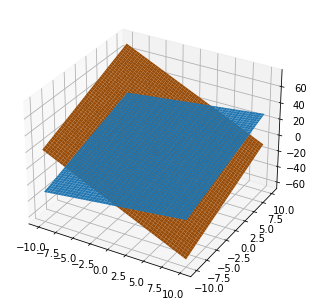

In [48]:
# 8.5/1. Найдите нормальное псевдорешение недоопределенной системы:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])

fig = figure()
ax = Axes3D(fig)
X = np.arange(-10, 10, 0.01)
Y = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(X, Y)
Z1 = -1 + X + 2*Y
Z2 = (12 - 8*X + 5*Y) / 2
ax.plot_surface(X, Y, Z1)
ax.plot_surface(X, Y, Z2)
ax.scatter(0, 0, 0, 'z', 50, 'red')
show()

In [46]:
# Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 
def Q(x, y, z):
    return(x**2 + y**2 + z**2)
#np.linalg.det(A), np.linalg.det(B)
#np.linalg.solve(A, B)
np.linalg.lstsq(A, B)

<ipython-input-46-82795694ade0>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, B)


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

In [49]:
# 8.6/1. Найдите одно из псевдорешений вырожденной системы:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)
 
print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [50]:
print(np.dot(Q, R))
print(np.dot(np.transpose(Q), Q))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.00000000e+00 -5.26517217e-16 -2.55176183e-16]
 [-5.26517217e-16  1.00000000e+00  3.37757775e-16]
 [-2.55176183e-16  3.37757775e-16  1.00000000e+00]]


In [51]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [52]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [53]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [54]:
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


1.4999999999999893

In [55]:
np.linalg.norm(np.dot(A, X) - B)

1.2247448713915885

In [56]:
X = np.array([1.5, 1, 0.5])
np.linalg.norm(X),  np.linalg.norm(np.dot(A, X) - B)

(1.8708286933869707, 15.297058540778355)